# Importing necessary libraries

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


#validation
from sklearn.metrics import calinski_harabasz_score

# Loading the Data Set

In [34]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Intellihire

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Intellihire


In [35]:
# loading the dataset into a dataframe
data_df = pd.read_csv('data-final.csv')

# Data Preprocessing

In [36]:
# get the number of columns
num_columns = len(data_df.columns)

# print the number of columns
print("Number of columns:", num_columns)

Number of columns: 110


In [37]:
# select the necessary columns
data_df.drop(data_df.columns[50:107], axis=1, inplace=True)
data_df.drop(data_df.columns[51:], axis=1, inplace=True)

# show the first 5 rows of the new dataframe
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,SE
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,FI


In [38]:
# view the number of participants who responded to the survey
print('Number of participants: ', len(data_df))

Number of participants:  1015341


In [39]:
# handling missing values

print('Number of missing values: ', data_df.isnull().values.sum())
data_df.dropna(inplace=True)

Number of missing values:  89227


In [40]:
# create a new dataframe without null values containing only the necessary columns

clean_df = data_df.drop('country', axis=1)
columns = list(clean_df.columns)

# scaler = MinMaxScaler(feature_range=(0,1))
# new_df = scaler.fit_transform(clean_df)
# clean_df = pd.DataFrame(clean_df, columns=columns)

In [41]:
clean_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0


In [42]:
# save the clean data into a new csv file for future use

clean_df.to_csv('clean_data.csv', index=False)

In [43]:
# loading the clean dataset into a dataframe

df = pd.read_csv('clean_data.csv')
df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,5.0,1.0,5.0,1.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,3.0,1.0,5.0,1.0,4.0,3.0,4.0,5.0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,3.0,4.0,2.0,2.0,3.0,1.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0


In [44]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}


# group names and columns

EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

# Explanatory Data Analysis

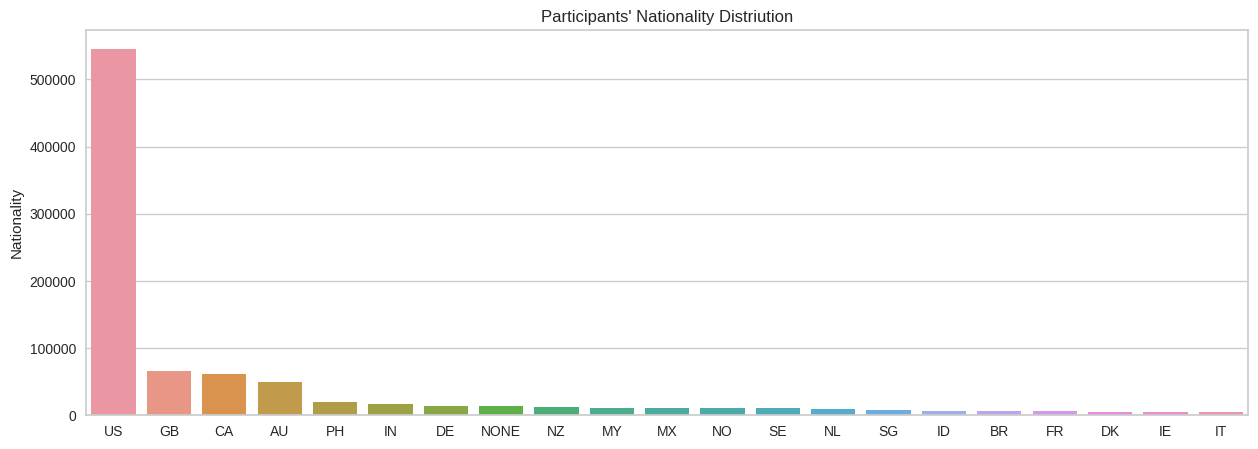

In [45]:
# Participants' Nationality Distriution

countries = pd.DataFrame(data_df['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Participants\' Nationality Distriution')
plt.ylabel('Participants');
plt.ylabel('Nationality');

In [46]:
print('Number of responses after handling missing values: ', len(df))

Number of responses after handling missing values:  1013481


In [47]:
# funtion to visualize the answer distribution for the questions 

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Openness Personality



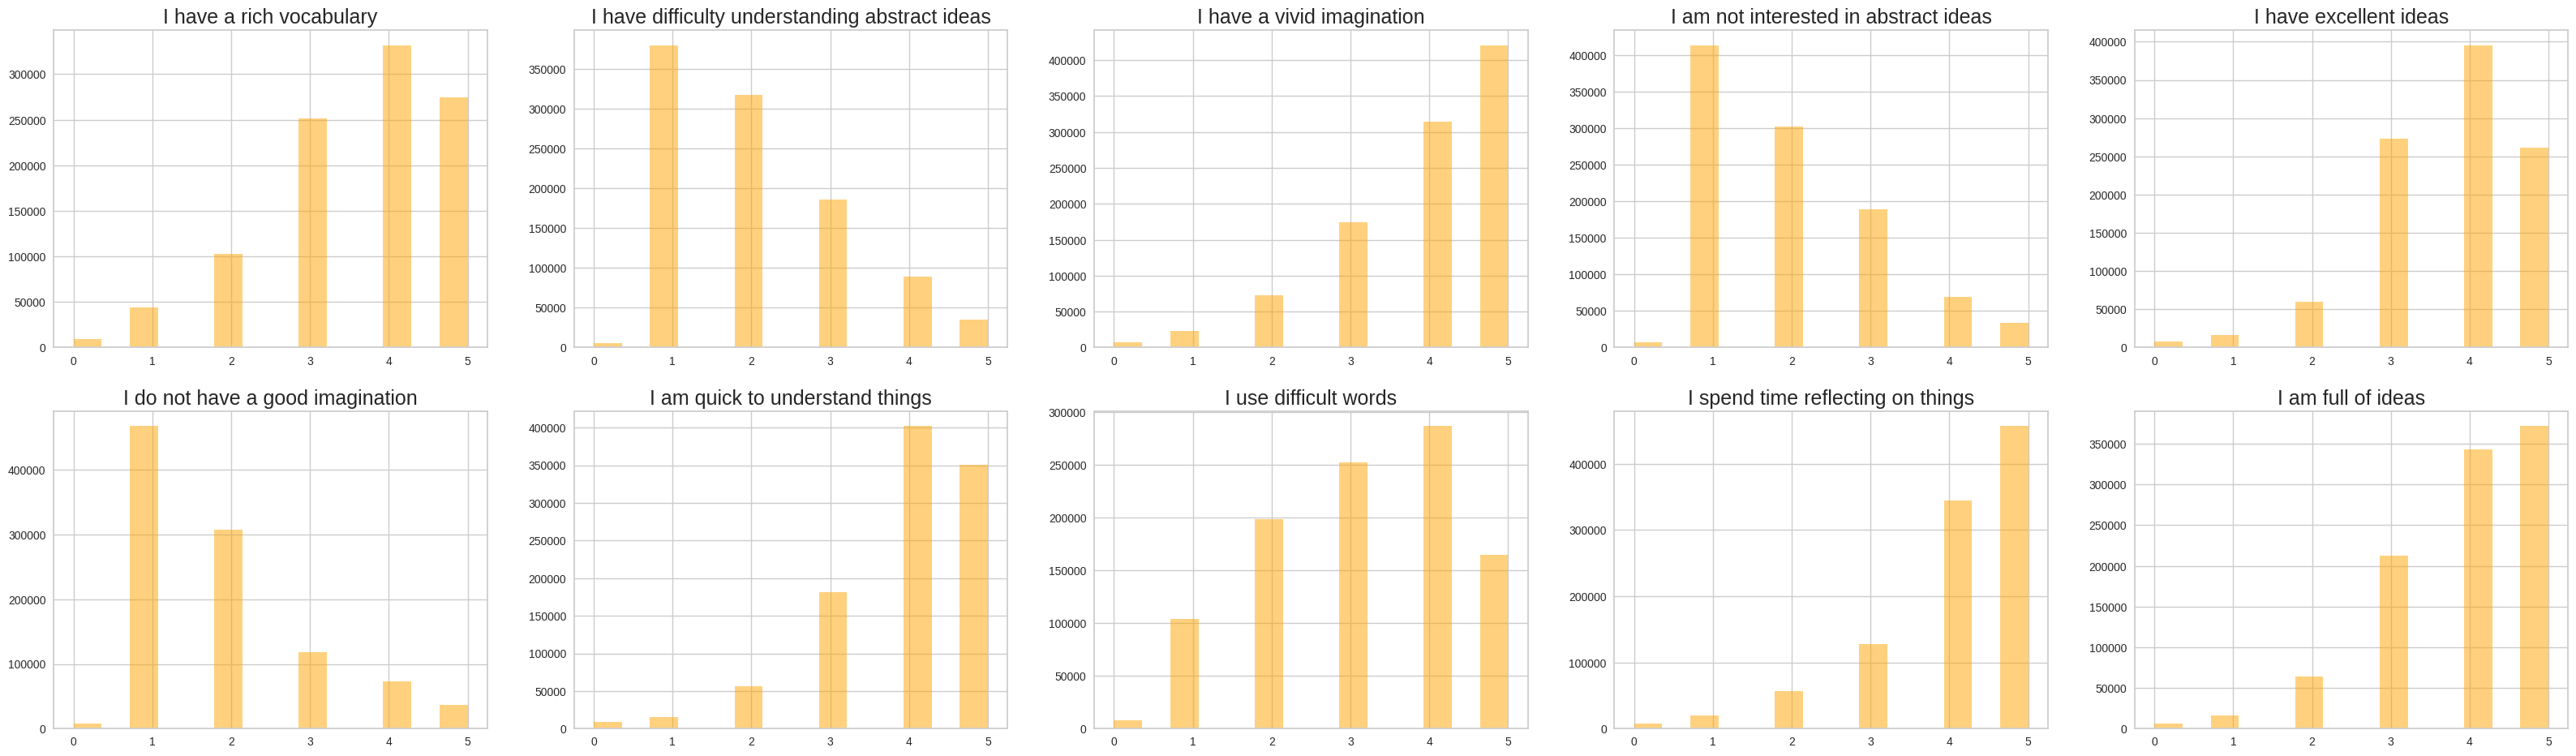

In [48]:
# OPENNESS

print('Q&As Related to Openness Personality\n')
vis_questions(OPN, opn_questions, 'orange')

Q&As Related to Conscientious Personality



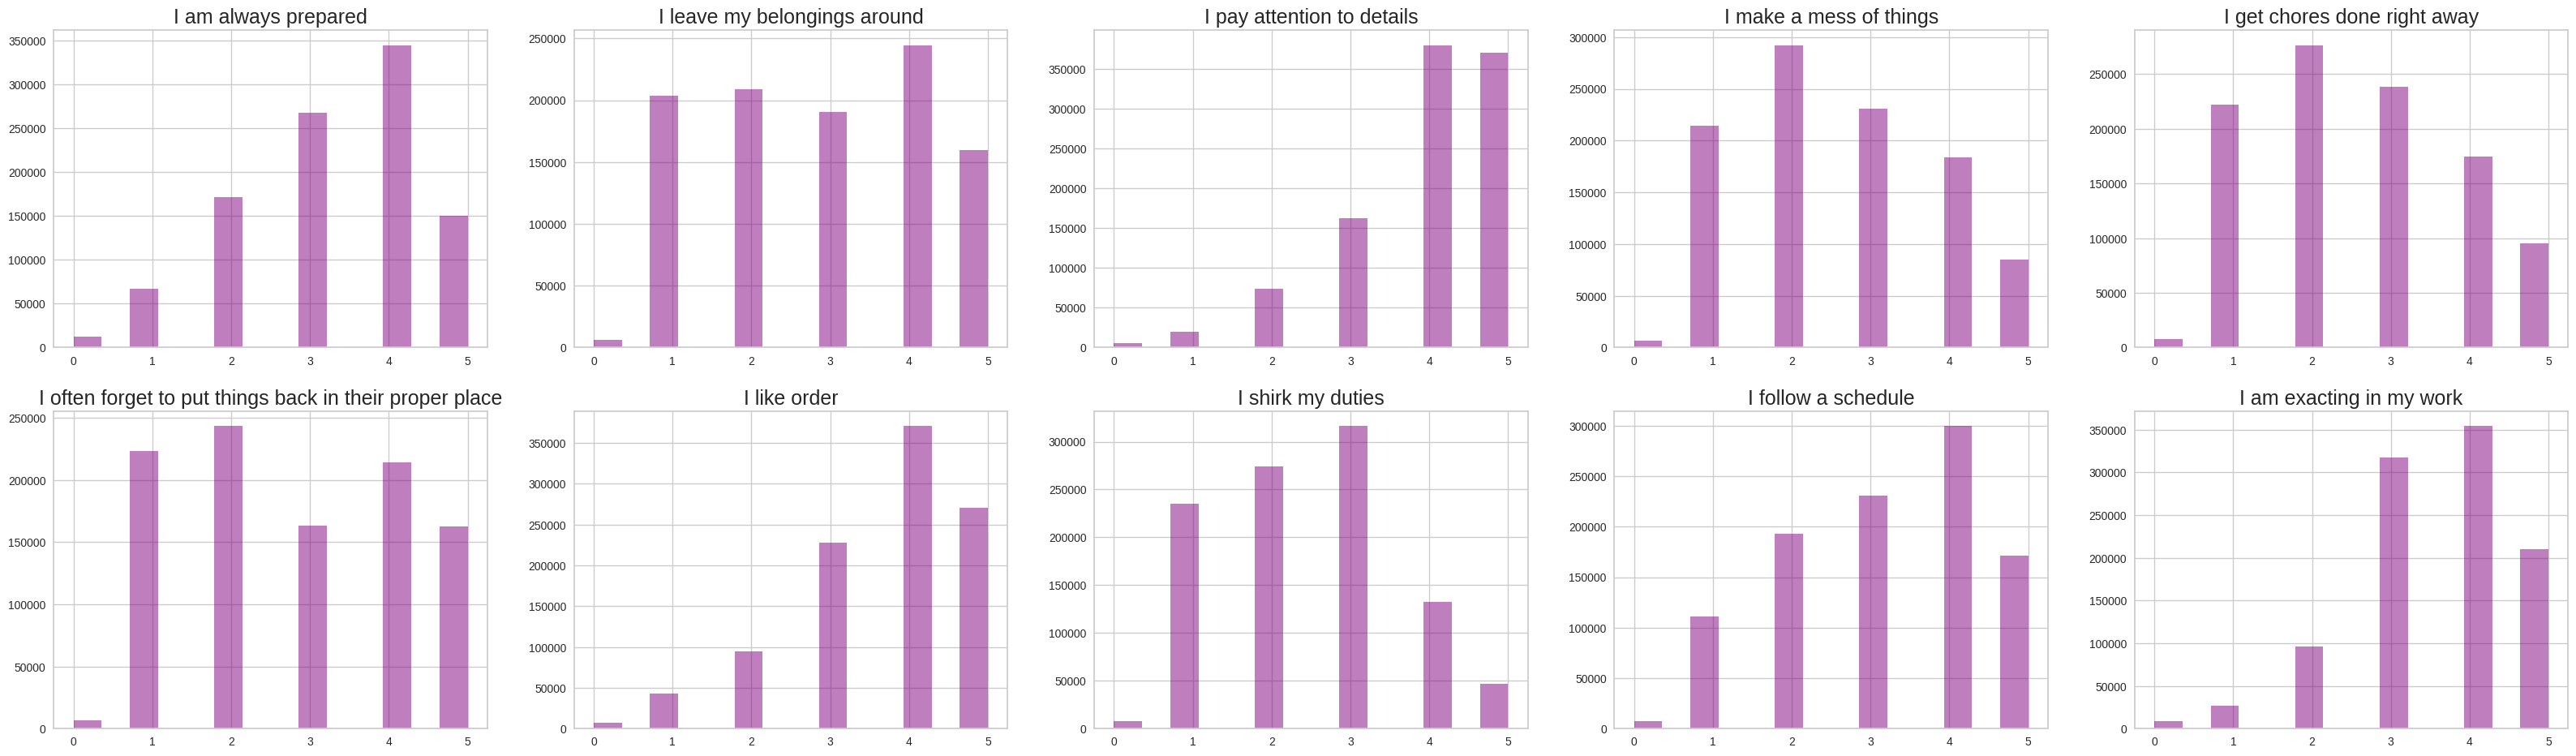

In [49]:
# CONSCIENTIOUS

print('Q&As Related to Conscientious Personality\n')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Extroversion Personality



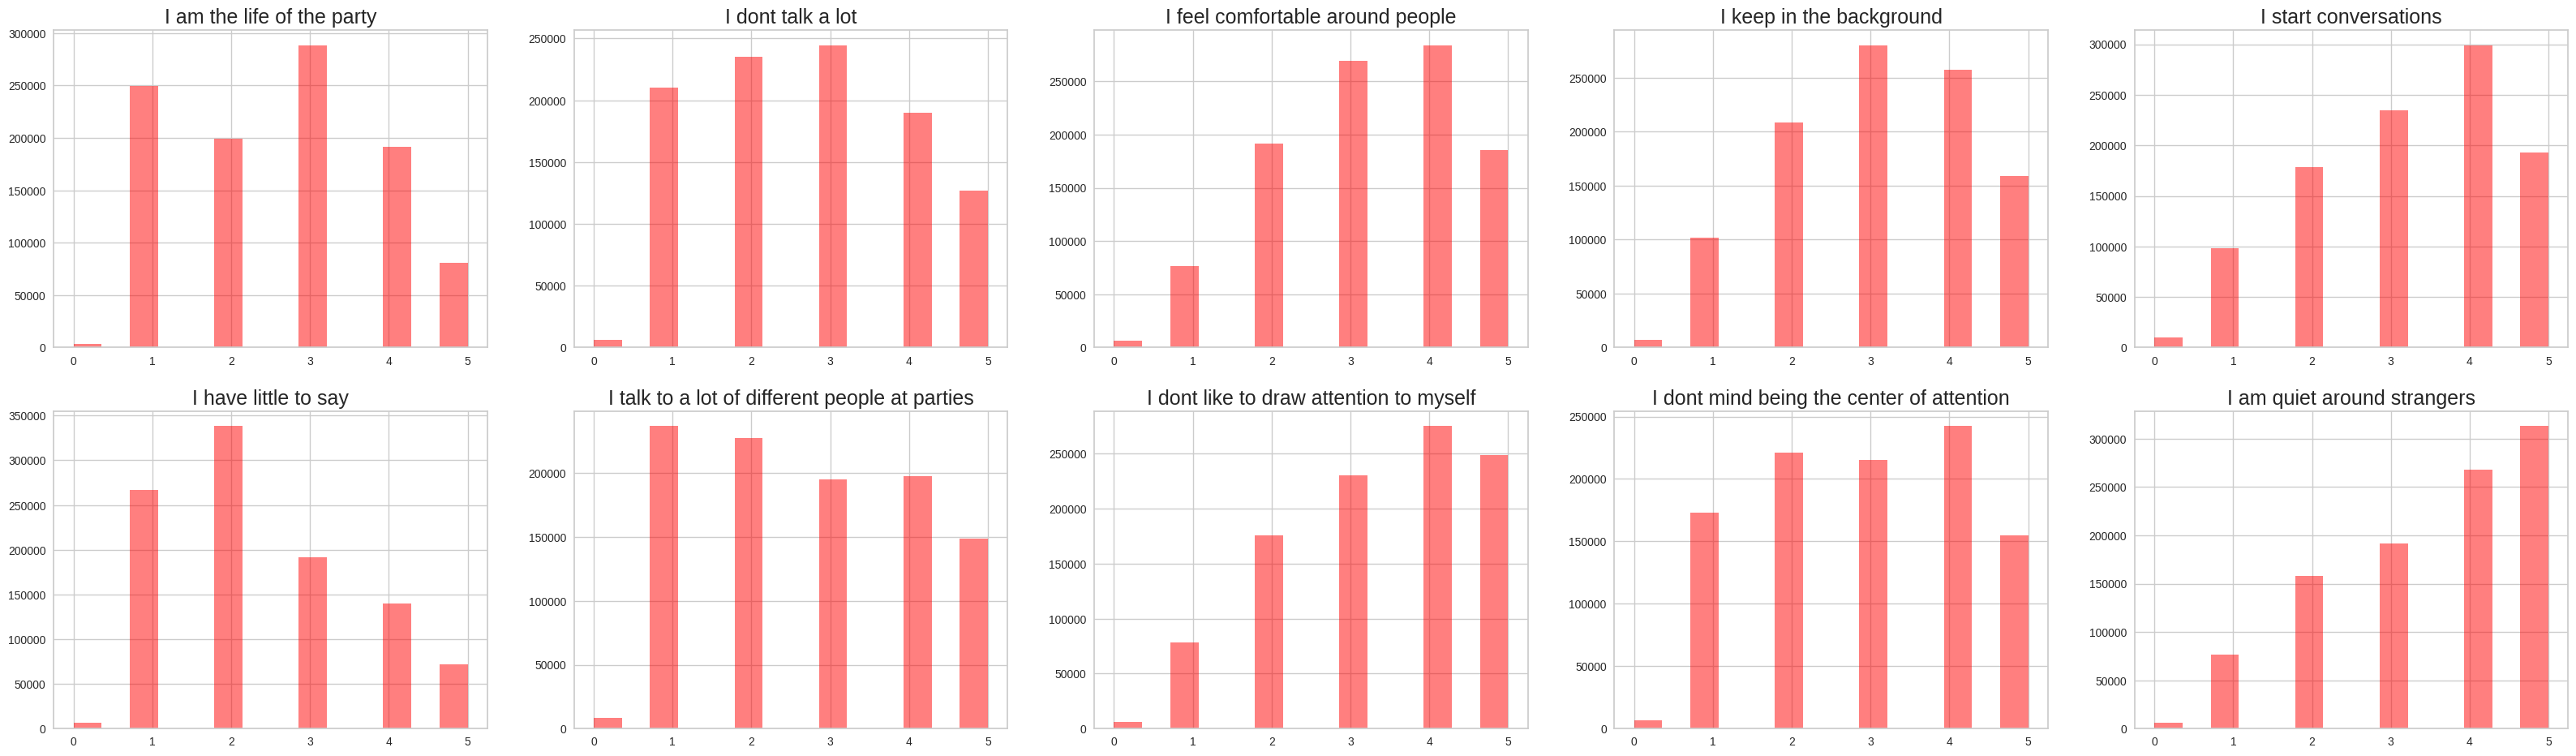

In [50]:
# EXTROVERSION

print('Q&As Related to Extroversion Personality\n')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Agreeable Personality



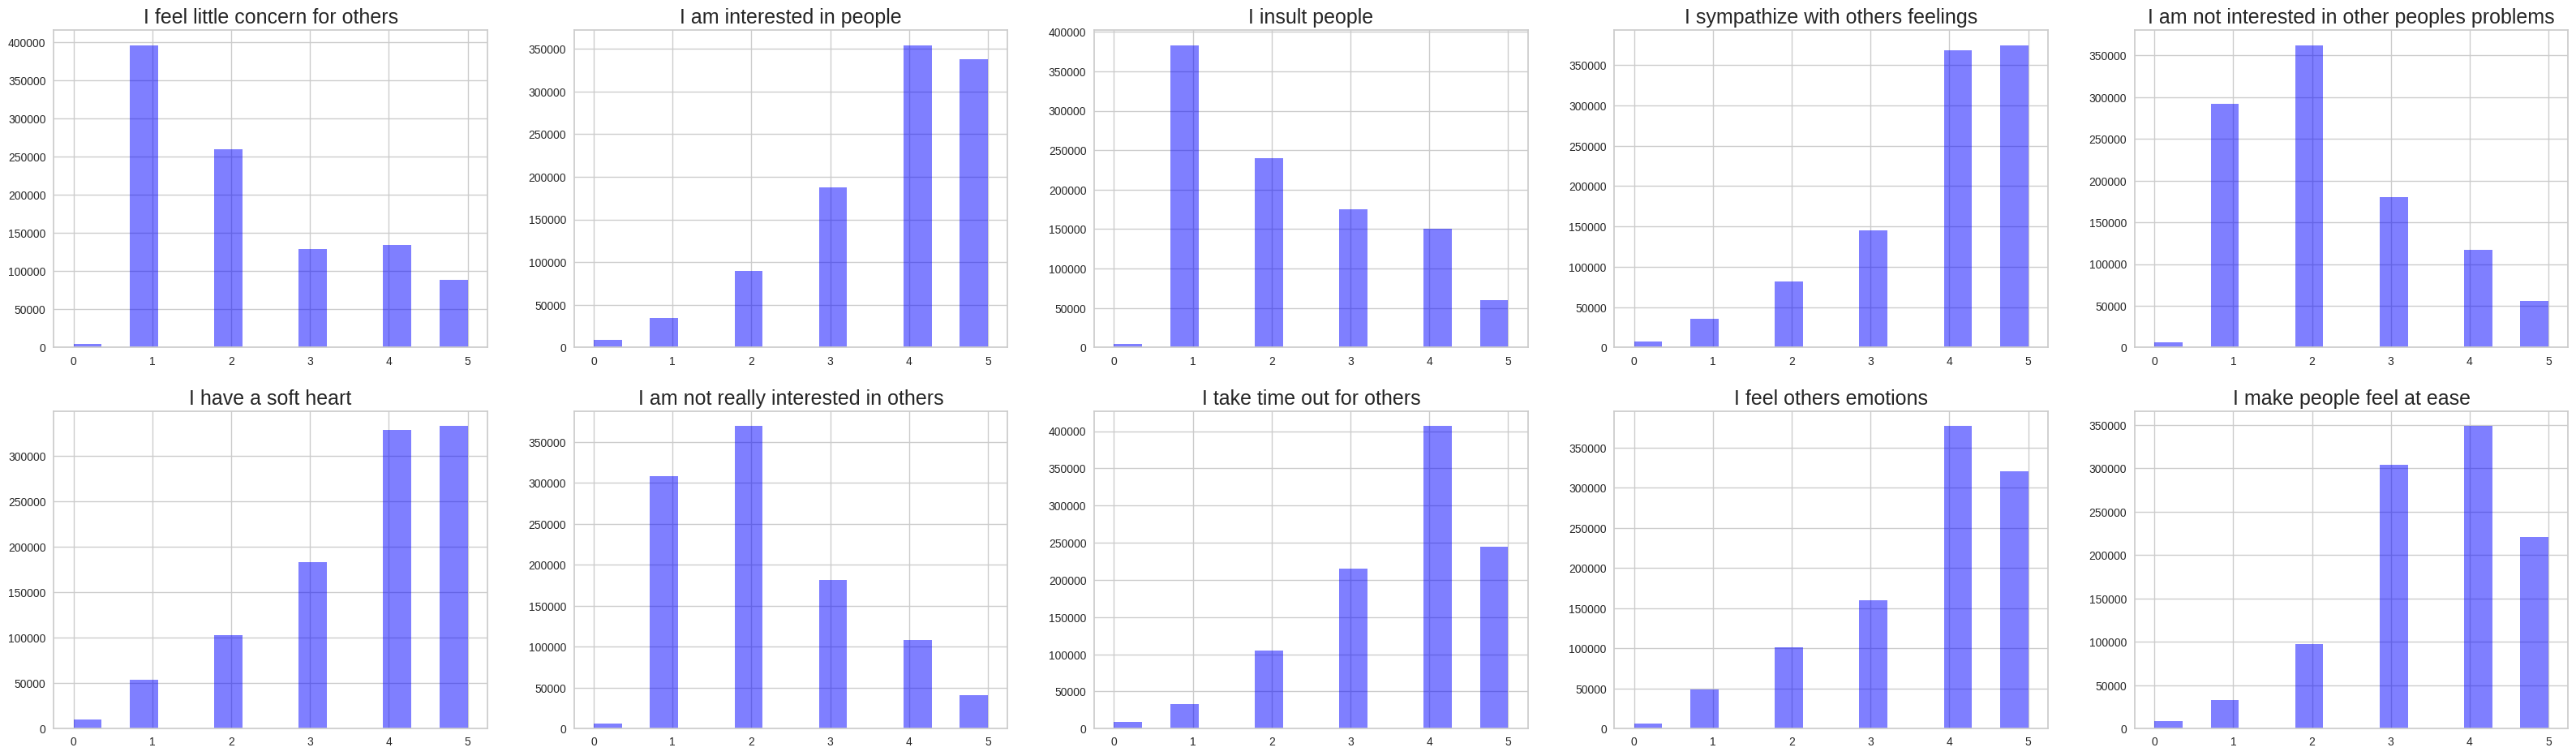

In [51]:
# AGREEABLENESS

print('Q&As Related to Agreeable Personality\n')
vis_questions(AGR, agr_questions, 'blue')

Q&As Related to Neuroticism Personality



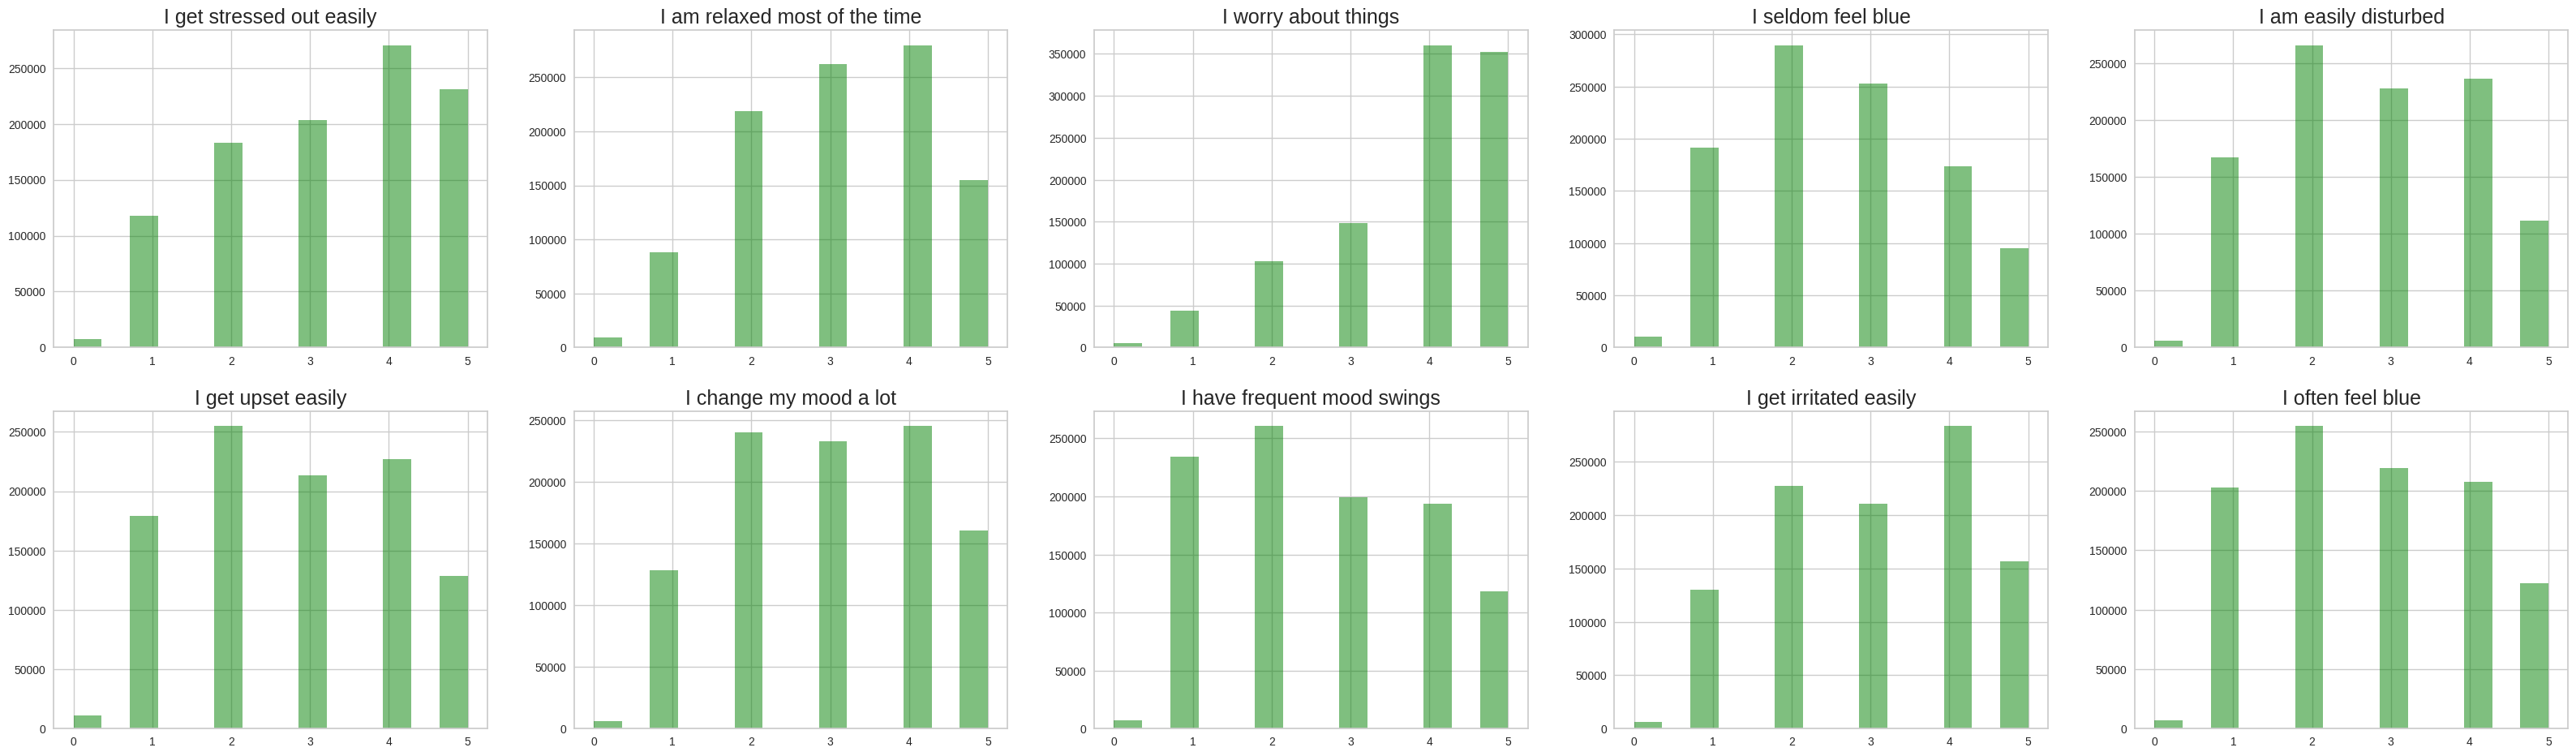

In [52]:
# NEUROTICISM

print('Q&As Related to Neuroticism Personality\n')
vis_questions(EST, est_questions, 'green')

# K-means Clustering

## Elbow Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

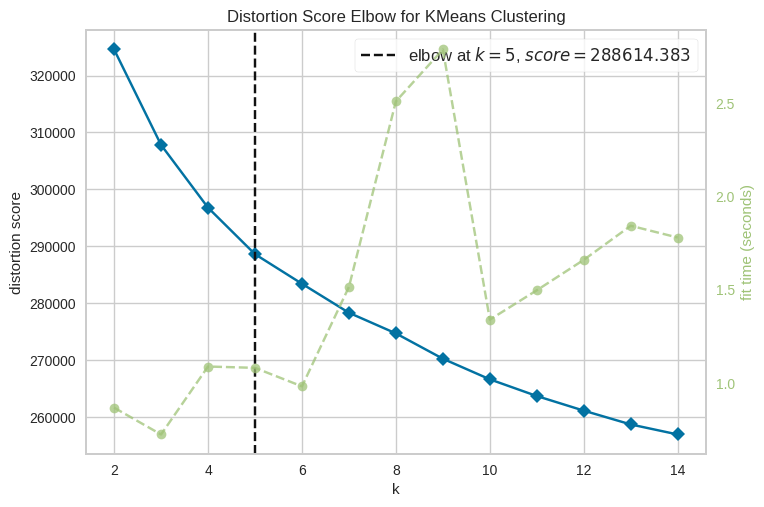

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# elbow visualization to determine the optimal number of clusters for a k-means clustering model.

# select a sample of 5000 records
df_sample = df[:5000]

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

**As you can see 5 clusters looks optimum for the data set.**

In [54]:
# get the average answer to the each question group for each response

col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data = pd.DataFrame()
data['openness'] = df[opn].sum(axis=1)/10
data['conscientiousness'] = df[csn].sum(axis=1)/10
data['extraversion'] = df[ext].sum(axis=1)/10
data['agreeableness'] = df[agr].sum(axis=1)/10
data['neuroticism'] = df[est].sum(axis=1)/10

In [55]:
data

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,3.3,3.2,3.0,3.1,2.4
1,2.7,3.1,3.4,3.2,2.1
2,3.1,2.8,2.9,2.8,2.6
3,3.1,2.7,2.6,3.2,2.7
4,3.6,3.2,3.5,3.0,2.3
...,...,...,...,...,...
1013476,2.9,3.1,3.2,3.6,3.3
1013477,3.3,2.8,3.4,3.3,4.0
1013478,3.6,3.3,3.3,3.5,2.7
1013479,3.5,3.0,2.8,3.1,3.3


In [56]:
# create the K-means Cluster Model
from sklearn.cluster import KMeans

# define 5 clusters and fit the model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# predicting the clusters for the dataset

pd.options.display.max_columns = 10
predictions = k_fit.labels_
data['cluster'] = predictions
data.head(25)

,openness,conscientiousness,extraversion,agreeableness,neuroticism,cluster
0,3.3,3.2,3.0,3.1,2.4,1
1,2.7,3.1,3.4,3.2,2.1,1
2,3.1,2.8,2.9,2.8,2.6,1
3,3.1,2.7,2.6,3.2,2.7,1
4,3.6,3.2,3.5,3.0,2.3,1
5,3.2,2.9,3.0,2.8,2.2,1
6,3.7,2.9,3.5,3.3,3.0,2
7,3.1,3.3,3.0,3.2,2.0,1
8,3.3,2.5,2.8,2.9,2.8,4
9,2.7,2.9,3.4,3.3,3.1,4


In [58]:
data.to_csv('Personality_clusters.csv', index=False)

##Analysing the Model and Predictions

In [59]:
# get the number of individuals for each cluster

data.cluster.value_counts()

2    262086
1    260877
4    252428
3    233460
0      4630
Name: cluster, dtype: int64

In [60]:
# get the average answer to the each question group for each cluster.

pd.options.display.max_columns = 150
data.groupby('cluster').mean()

,openness,conscientiousness,extraversion,agreeableness,neuroticism
cluster,,,,,
0,0.352354,0.383175,0.431749,0.404471,0.373952
1,3.218101,2.968747,3.021129,3.048747,2.248010
2,3.457966,3.324547,3.122530,3.274671,2.883112
3,3.416984,3.357243,3.074191,3.330638,3.843194
4,3.029298,2.908322,2.923771,3.030362,3.263734


         openness  conscientiousness  extraversion  agreeableness  neuroticism
cluster                                                                       
0        0.352354           0.383175      0.431749       0.404471     0.373952
1        3.218101           2.968747      3.021129       3.048747     2.248010
2        3.457966           3.324547      3.122530       3.274671     2.883112
3        3.416984           3.357243      3.074191       3.330638     3.843194
4        3.029298           2.908322      2.923771       3.030362     3.263734


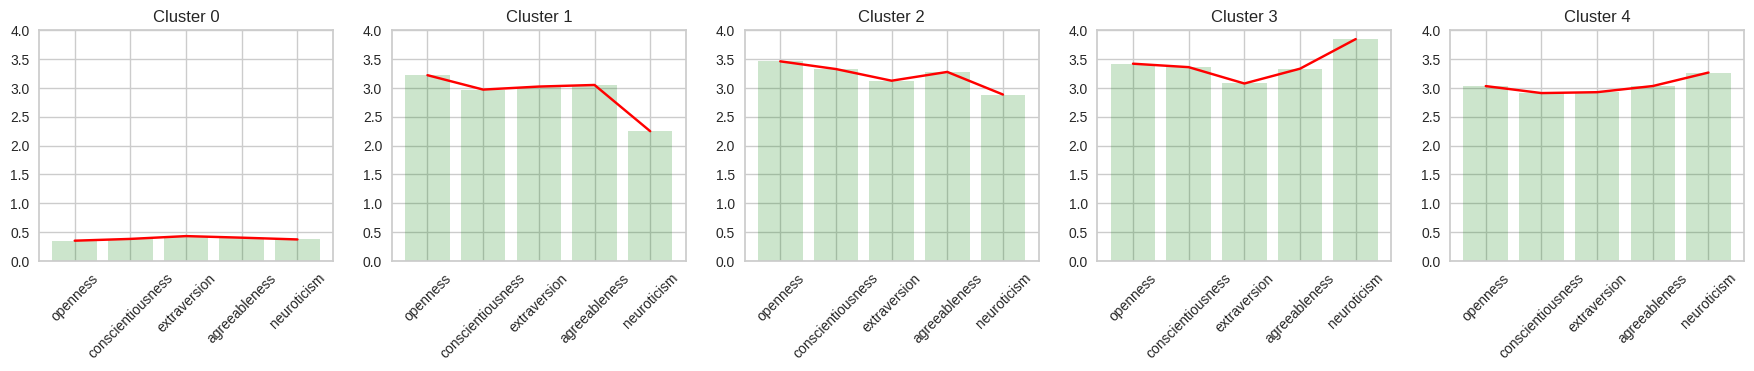

In [61]:
# visualize the obtained the distribution of the Big Five personality ratings for each of the five clusters

dataclusters = data.groupby('cluster').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

print(dataclusters)

##Visualizing the Clusters

In [62]:
# applying PCA to the data matrix to obtain the principal components - PCA is used for dimensionality reduction before applying k-means clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = predictions
df_pca.head()

,PCA1,PCA2,cluster
0,1.584795,-0.117102,1
1,1.708732,0.163752,1
2,1.523604,0.255601,1
3,1.466425,0.198315,1
4,1.633890,-0.349153,1


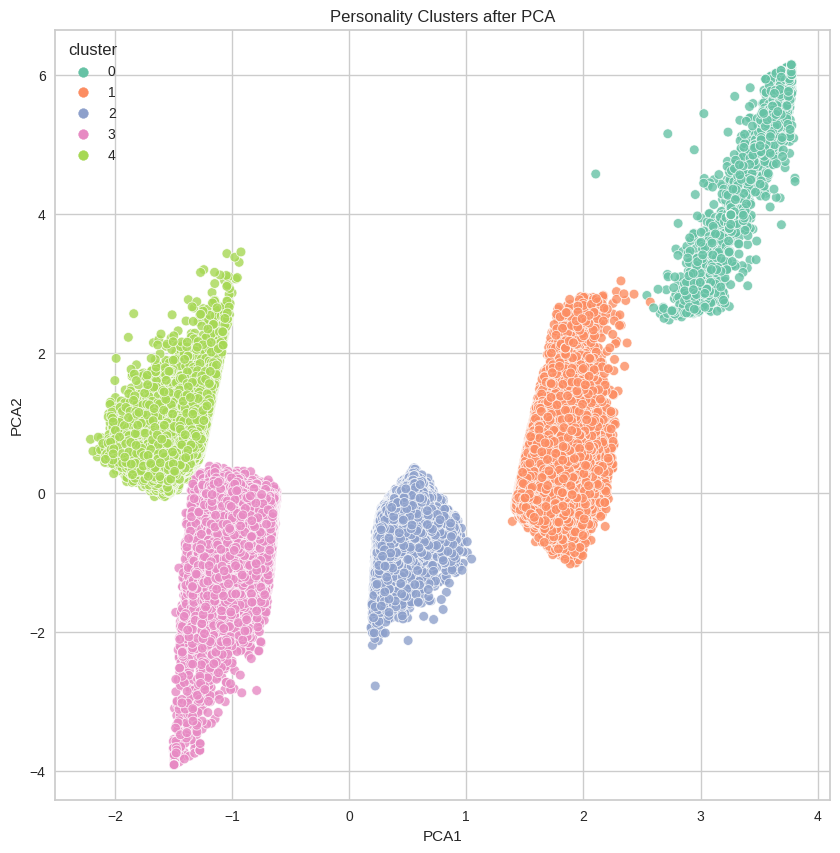

In [63]:
# visualize the five personality clusters after applying PCA

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

# Saving the model

In [64]:
import pickle
from sklearn.cluster import KMeans

# Save the model to a file
filename = 'kmeans_model.sav'
pickle.dump(k_fit, open(filename, 'wb'))

print("K-means model saved successfully.")

K-means model saved successfully.
